## Drug Gateway: Generate Prop_Hist_Box

### gateway drug -noun
- a habit-forming drug that, while not itself addictive, may lead to the use of other addictive drugs.
<br>
- **In other words**: A popular first drug that is consumed before another drug (not whether peer pressure was the most important component)<br>***(Peer Pressure | Ever Used)***
- In other words, if the earliest consumption of a drug preceds a later consumption of some other drug, at an older age
    - ex. Tobacco at 14, Alcohol at 15

https://www.datafiles.samhsa.gov/study-dataset/national-survey-drug-use-and-health-2016-nsduh-2016-ds0001-nid17185
<br>
https://pdas.samhsa.gov/#/


### 1) Import Data
    - Create Binary/Integer Data Frames
    - Replace Months with Appropriate Values

In [1]:
###------------------------ Launch
import pandas as pd
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import time
#######-------------------------------------------------
## change working directory
os.chdir('../Data')

In [2]:
df_copy = pd.read_csv('FinalData.csv', sep=',')
df_copy.head()

,Unnamed: 0,Age of First Alcohol Use,IRALCYFU,IRCGRAGE,IRCIGAGE,IRCIGYFU,IRCOCAGE,IRCRKAGE,IRECSTMOAGE,IRHALLUCAGE,...,ALC First,MJ First,HAL First,STI First,HER First,Drug After,Ever Used,Age of First Tobacco Use,Age of First Hallucinogen Use,Age of First Stimulant Use
0,0,15.0,2000.0,25.0,16.0,2001.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,1,16.0,NaN,NaN
1,1,15.0,2008.0,16.0,15.0,2008.0,20.0,22.0,15.0,13.0,...,0,0,1,0,0,1,1,15.0,13.0,16.0
2,2,16.0,12.0,26.0,26.0,2002.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,1,26.0,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,4,18.0,1969.0,NaN,5.0,1956.0,34.0,NaN,NaN,NaN,...,0,0,0,0,0,1,1,5.0,NaN,34.0


In [3]:
df_copy.shape

(56897, 112)

In [2]:
### Distribution of Age of First Use (Alcohol, Stiumulands, Marijuana, Heroin, Halluciongen) given Tobacco was first
plt.figure(figsize=(10,10))
(df_copy[['Age of First Tobacco Use', 'Age of First Alcohol Use', 'Age of First Marijuana Use',
                                   'Age of First Stimulant Use', 'Age of First Hallucinogen Use', 
                                   'Age of First Heroine Use']]).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((5,40))
plt.grid(False)
plt.title('Distributions of the Age of First Use of Various Drug Subtances and Categories', fontsize=15)
plt.show()

NameError: name 'df_copy' is not defined

<Figure size 720x720 with 0 Axes>

# Tobacco
- Proportion of respondants that have ever used
- Proportion of respondents who have ever used for whom tobacco was their first drug
    - (First==Tobacco)/EverUsedTobacco(CIG,CG,SMKLSS)
- Distribution/Description of the age of first use
- Proportion of repondants who have ever used another substance given their first drug was Tobacco
    - In other words: Given (MaxAge > MinAge)/(First==Tobacco)
    - Get the distribution of age of first use of Alcohol,Cocaine,Meth,Marijuana,Opiates given their first substance was tobacco

In [4]:
### Proportion that have ever Used Tobacco
df_ever_tob = df_copy[(df_copy['CIGFLAG']==1)|(df_copy['CGRFLAG']==1)|(df_copy['SMKLSSFLAG']==1)]
df_ever_tob.shape[0], df_ever_tob.shape[0]/df_copy['CIGFLAG'].count()

(30801, 0.5413466439355327)

In [5]:
### Proportion that have used Tobacco and it was their first substance
df_tob_first = df_copy[(df_copy['TOB First']==1)&(df_copy['ALC First']==0)&(df_copy['MJ First']==0)&(df_copy['HAL First']==0)&(df_copy['STI First']==0)&(df_copy['HER First']==0)]

df_tob_first.shape[0], df_tob_first.shape[0]/df_ever_tob.shape[0]

(11953, 0.3880718158501347)

In [10]:
### Proportion for who Tobacco was their first substance
df_tob_first.shape[0]/df_copy['CIGFLAG'].count()

0.21008137511643848

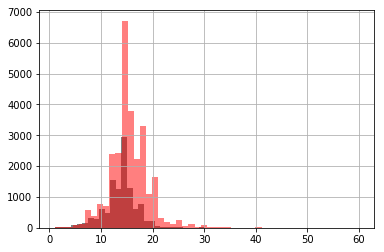

In [11]:
### Distribution of Age of First Use of Tobacco(Given it was their first Drug)
df_tob_first['Age of First Tobacco Use'].hist(bins=50, color='black', alpha=0.5)
df_copy['Age of First Tobacco Use'].hist(bins=50,color= 'red', alpha=0.5)
plt.show()

In [6]:
### Proportion whose use of another drug had a first age > than the age they tried Tobacco
df_tob_first['Drug After'].sum(), df_tob_first['Drug After'].sum()/df_tob_first.shape[0]

(10485, 0.8771856437714382)

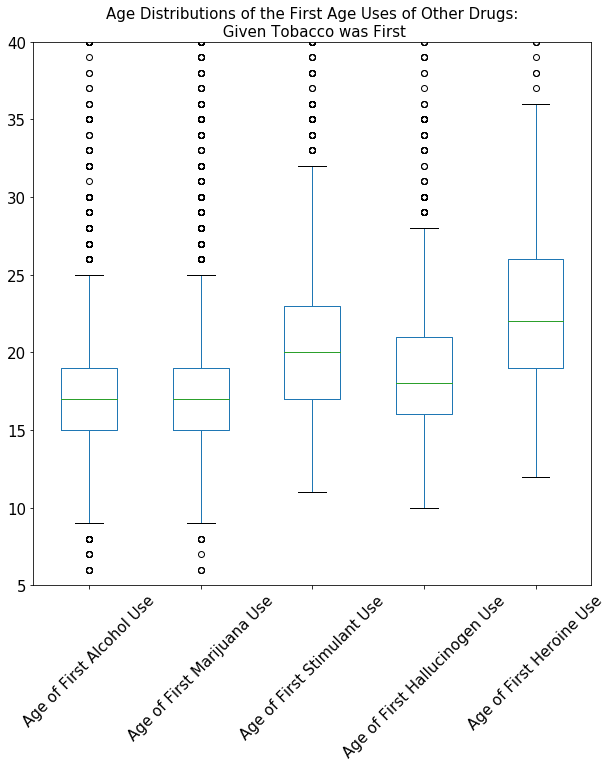

In [7]:
### Distribution of Age of First Use (Alcohol, Stiumulands, Marijuana, Heroin, Halluciongen) given Tobacco was first
plt.figure(figsize=(10,10))
(df_tob_first[['Age of First Alcohol Use', 'Age of First Marijuana Use', 
                                   'Age of First Stimulant Use', 'Age of First Hallucinogen Use', 
                                   'Age of First Heroine Use']]).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((5,40))
plt.grid(False)
plt.title('Age Distributions of the First Age Uses of Other Drugs:\n Given Tobacco was First', fontsize=15)
plt.show()

In [8]:
### Proportion of Future Uses of Other subsances
print('Alcohol')
print((df_tob_first['Age of First Alcohol Use'].count(), 
df_tob_first['Age of First Alcohol Use'].count()/df_tob_first.shape[0]))
print('')

print('Marijuana')
print((df_tob_first['Age of First Marijuana Use'].count(), 
df_tob_first['Age of First Marijuana Use'].count()/df_tob_first.shape[0]))
print('')

print('Stimulants')
print((df_tob_first['Age of First Stimulant Use'].count(), 
df_tob_first['Age of First Stimulant Use'].count()/df_tob_first.shape[0]))
print('')

print('Hallucinogen')
print((df_tob_first['Age of First Hallucinogen Use'].count(), 
df_tob_first['Age of First Hallucinogen Use'].count()/df_tob_first.shape[0]))
print('')

print('Heroine')
print((df_tob_first['Age of First Heroine Use'].count(), 
df_tob_first['Age of First Heroine Use'].count()/df_tob_first.shape[0]))

Alcohol
(10485, 0.8771856437714382)

Marijuana
(6446, 0.5392788421316824)

Stimulants
(1943, 0.16255333389107338)

Hallucinogen
(2144, 0.17936919601773613)

Heroine
(270, 0.02258847151342759)


In [126]:
## Create dataframe of columns of years between substance uses 
df_tob_after = pd.DataFrame({'Tob to Alc': (df_tob_first['Age of First Alcohol Use'] - df_tob_first['Age of First Use']), 
                       'Tob to Mj': (df_tob_first['Age of First Marijuana Use']- df_tob_first['Age of First Use']), 
             'Tob to STI': (df_tob_first['Age of First Stimulant Use']- df_tob_first['Age of First Use']), 
            'Tob to HAL': (df_tob_first['Age of First Hallucinogen Use']- df_tob_first['Age of First Use']), 
            'Tob to HER': (df_tob_first['Age of First Heroine Use']- df_tob_first['Age of First Use'])})


df_tob_after = df_tob_after[['Tob to Alc', 'Tob to Mj', 'Tob to STI', 
                 'Tob to HAL','Tob to HER']]
#df_tob_after = df_tob_after.drop_duplicates()

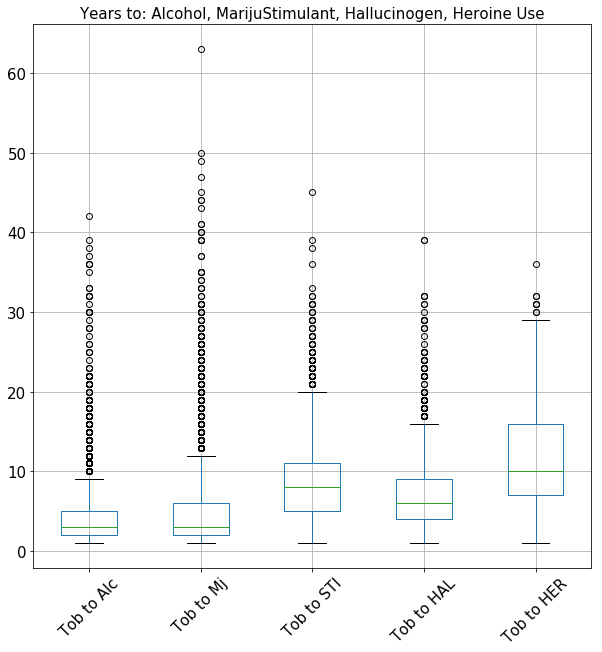

In [136]:
plt.figure(figsize=(10,10))
(df_tob_after).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('Years to: Alcohol, MarijuStimulant, Hallucinogen, Heroine Use', fontsize=15)
plt.show()

# Alcohol
- Proportion of respondants that have ever used
- Proportion of respondents who have ever used for whom tobacco was their first drug
    - (First==Alcohol)/EverUsedAlcohol(Alc)
- Distribution/Description of the age of first use
- Proportion of repondants who have ever used another substance given their first drug was Alcohol
    - In other words: Given (MaxAge > MinAge)/(First==Alcohol)
    - Get the distribution of age of first use of Tobacco,Cocaine,Meth,Marijuana,Opiates given their first substance was Alcohol

In [8]:
### Proportion that have ever Used Alcohol
df_ever_alc = df_copy[(df_copy['ALCFLAG']==1)]
df_ever_alc.shape[0], df_ever_alc.shape[0]/df_copy['ALCFLAG'].count()

(40478, 0.711425909977679)

In [9]:
### Proportion that have used Alcohol and it was their first substance
df_alc_first = df_copy[(df_copy['TOB First']==0)&(df_copy['ALC First']==1)&(df_copy['MJ First']==0)&(df_copy['HAL First']==0)&(df_copy['STI First']==0)&(df_copy['HER First']==0)]

df_alc_first.shape[0], df_alc_first.shape[0]/df_ever_alc.shape[0]

(17814, 0.44009091358268687)

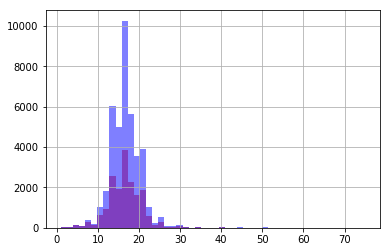

In [10]:
### Distribution of Age of First Use of Alcohol(Given it was their first Drug)
df_alc_first['Age of First Alcohol Use'].hist(bins=50, color='red', alpha=0.5)
df_copy['Age of First Alcohol Use'].hist(bins=50,color= 'blue', alpha=0.5)
plt.show()

In [11]:
### Proportion whose use of another drug had a first age > than the age they tried Alcohol
df_alc_first['Drug After'].sum(), df_alc_first['Drug After'].sum()/df_alc_first.shape[0]

(9630, 0.5405860559110812)

In [137]:
### Distribution of Age of First Use (Tobacco, Stiumulands, Marijuana, Heroin, Halluciongen) given Alcohol was first
plt.figure(figsize=(10,10))
(df_alc_first[['Age of First Tobacco Use', 'Age of First Marijuana Use', 
                                   'Age of First Stimulant Use', 'Age of First Hallucinogen Use', 
                                   'Age of First Heroine Use']]).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Age Distributions of the First Age Uses of Other Drugs\n Given Alcohol was First')
plt.show()

In [138]:
### Proportion of Future Uses of Other subsances
print('Tobacco')
print((df_alc_first['Age of First Tobacco Use'].count(), 
df_alc_first['Age of First Tobacco Use'].count()/df_alc_first.shape[0]))
print('')

print('Marijuana')
print((df_alc_first['Age of First Marijuana Use'].count(), 
df_alc_first['Age of First Marijuana Use'].count()/df_alc_first.shape[0]))
print('')

print('Stimulants')
print((df_alc_first['Age of First Stimulant Use'].count(), 
df_alc_first['Age of First Stimulant Use'].count()/df_alc_first.shape[0]))
print('')

print('Hallucinogen')
print((df_alc_first['Age of First Hallucinogen Use'].count(), 
df_alc_first['Age of First Hallucinogen Use'].count()/df_alc_first.shape[0]))
print('')

print('Heroine')
print((df_alc_first['Age of First Heroine Use'].count(), 
df_alc_first['Age of First Heroine Use'].count()/df_alc_first.shape[0]))

In [ ]:
df_tob_after = pd.DataFrame({'Alc to Tob': (df_tob_first['Age of First Alcohol Use'] - df_tob_first['Age of First Use']), 
                       'Tob to Mj': (df_tob_first['Age of First Marijuana Use']- df_tob_first['Age of First Use']), 
             'Tob to STI': (df_tob_first['Age of First Stimulant Use']- df_tob_first['Age of First Use']), 
            'Tob to HAL': (df_tob_first['Age of First Hallucinogen Use']- df_tob_first['Age of First Use']), 
            'Tob to HER': (df_tob_first['Age of First Heroine Use']- df_tob_first['Age of First Use'])})


df_tob_after = df_tob_after[['Alc to Tob', 'Alc to Mj', 'Alc to STI', 
                 'Tob to HAL','Tob to HER']]

In [ ]:
plt.figure(figsize=(10,10))
(df_tob_after).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.title('Years to Tobacco, Marijuana, Stimulant, Hallucinogen, Heroine Use', fontsize=15)
plt.show()

# Marijuana
- Proportion of respondants that have ever used
- Proportion of respondents who have ever used for whom MJ was their first drug
    - (First==MJ)/EverUsedAlcohol(MJ)
- Distribution/Description of the age of first use
- Proportion of repondants who have ever used another substance given their first drug was Alcohol
    - In other words: Given (MaxAge > MinAge)/(First==MJ)
    - Get the distribution of age of first use of Tobacco,Cocaine,Meth,Alcohol,Opiates given their first substance was MJ

In [22]:
### Proportion that have ever Used Marijuana
df_ever_mj= df_copy[(df_copy['MRJFLAG']==1)]
df_ever_mj.shape[0], df_ever_mj.shape[0]/df_copy['MRJFLAG'].count()

(23789, 0.41810640279803857)

In [23]:
### Proportion that have used Marijuana and it was their first substance
df_mj_first = df_copy[(df_copy['TOB First']==0)&(df_copy['ALC First']==0)&(df_copy['MJ First']==1)&(df_copy['HAL First']==0)&(df_copy['STI First']==0)&(df_copy['HER First']==0)]

df_mj_first['MJ First'].sum(), df_mj_first['MJ First'].sum()/df_ever_mj.shape[0]

(2869, 0.12060195888856194)

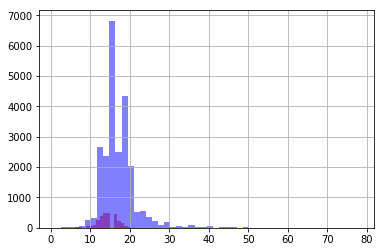

In [24]:
### Distribution of Age of First Use of Marijuana(Given it was their first Drug)
df_mj_first['Age of First Marijuana Use'].hist(bins=50, color='red', alpha=0.5)
df_copy['Age of First Marijuana Use'].hist(bins=50,color= 'blue', alpha=0.5)
plt.show()

In [25]:
### Proportion whose use of another drug had a first age > than the age they tried Tobacco
df_mj_first['Drug After'].sum(), df_mj_first['Drug After'].sum()/df_mj_first.shape[0]

(2470, 0.8609271523178808)

In [150]:
### Distribution of Age of First Use (Alcohol, Tobacco, Stiumulants, Heroine, Halluciongen) given Marijuana was first
plt.figure(figsize=(10,10))
(df_mj_first[['Age of First Alcohol Use', 'Age of First Tobacco Use', 
                                   'Age of First Stimulant Use', 'Age of First Hallucinogen Use', 
                                   'Age of First Heroine Use']]).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Age Distributions of the First Age Uses of Other Drugs\n Given Marijuana was First')
plt.show()

In [149]:
### Proportion of Future Uses of Other subsances
print('Alcohol')
print((df_mj_first['Age of First Alcohol Use'].count(), 
df_mj_first['Age of First Alcohol Use'].count()/df_mj_first.shape[0]))
print('')

print('Tobacco')
print((df_mj_first['Age of First Tobacco Use'].count(), 
df_mj_first['Age of First Tobacco Use'].count()/df_mj_first.shape[0]))
print('')

print('Stimulants')
print((df_mj_first['Age of First Stimulant Use'].count(), 
df_mj_first['Age of First Stimulant Use'].count()/df_mj_first.shape[0]))
print('')

print('Hallucinogen')
print((df_mj_first['Age of First Hallucinogen Use'].count(), 
df_mj_first['Age of First Hallucinogen Use'].count()/df_mj_first.shape[0]))
print('')

print('Heroine')
print((df_mj_first['Age of First Heroine Use'].count(), 
df_mj_first['Age of First Heroine Use'].count()/df_mj_first.shape[0]))

# Tobacco/Alcohol

In [28]:
### Proportion that have ever Used Alcohol & Tobacco
df_tob_alc = df_copy[(df_copy['TOBFLAG']==1) & (df_copy['ALCFLAG']==1)]
df_tob_alc.shape[0], df_tob_alc.shape[0]/df_copy['ALCFLAG'].count()

(29159, 0.5124874773713904)

In [29]:
### Tobacco & Alcohol were first Substances
df_tob_alc_first = df_copy[(df_copy['TOB First']==1)&(df_copy['ALC First']==1)&(df_copy['MJ First']==0)&(df_copy['HAL First']==0)&(df_copy['STI First']==0)&(df_copy['HER First']==0)]

In [30]:
### Proportion that have used Alcohol & Tobacco and it was their first substance
df_tob_alc_first.shape[0], df_tob_alc_first.shape[0]/df_tob_alc.shape[0]

(3545, 0.12157481395109572)

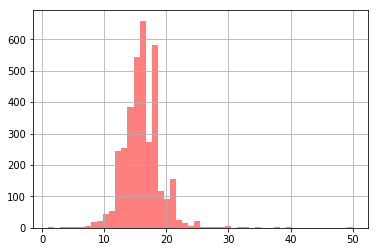

In [31]:
### Distribution of Age of First Use of Alcohol & Tobacco(Given it was their first Drug)
df_tob_alc_first['Age of First Use'].hist(bins=50, color='red', alpha=0.5)
#df_copy['IRALCAGE'].hist(bins=50,color= 'blue', alpha=0.5)
plt.show()

In [32]:
### Proportion whose use of another drug had a first age > than the age they tried Tobacco & Alcohol
df_tob_alc_first['Drug After'].sum(), df_tob_alc_first['Drug After'].sum()/df_tob_alc_first.shape[0]

(2418, 0.6820874471086037)

In [147]:
### Distribution of Age of First Use (Stiumulants, Marijuana, Heroin, Halluciongen) given Tobacco/Alcohol was first
plt.figure(figsize=(10,10))
(df_tob_alc_first[['Age of First Marijuana Use','Age of First Stimulant Use', 'Age of First Hallucinogen Use', 
                                   'Age of First Heroine Use']]).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Age Distributions of the First Age Uses of Other Drugs\n Given Tobacco & Alcohol were First')
plt.show()

In [146]:
### Proportion of Future Uses of Other subsances
print('Marijuana')
print((df_tob_alc_first['Age of First Marijuana Use'].count(), 
df_tob_alc_first['Age of First Marijuana Use'].count()/df_tob_alc_first.shape[0]))
print('')

print('Stimulants')
print((df_tob_alc_first['Age of First Stimulant Use'].count(), 
df_tob_alc_first['Age of First Stimulant Use'].count()/df_tob_alc_first.shape[0]))
print('')

print('Hallucinogen')
print((df_tob_alc_first['Age of First Hallucinogen Use'].count(), 
df_tob_alc_first['Age of First Hallucinogen Use'].count()/df_tob_alc_first.shape[0]))
print('')

print('Heroine')
print((df_tob_alc_first['Age of First Heroine Use'].count(), 
df_tob_alc_first['Age of First Heroine Use'].count()/df_tob_alc_first.shape[0]))

### Tobacco/Marijuana

In [35]:
### Proportion that have ever Used Tobacco & Marijuana
df_tob_mj = df_copy[(df_copy['TOBFLAG']==1) & (df_copy['MRJFLAG']==1)]
df_tob_mj.shape[0], df_tob_mj.shape[0]/df_copy.shape[0]

(20690, 0.36363955920347296)

In [36]:
### Tobacco & Marijuana were first Substances
df_tob_mj_first = df_copy[(df_copy['TOB First']==1)&(df_copy['ALC First']==0)&(df_copy['MJ First']==1)&(df_copy['HAL First']==0)&(df_copy['STI First']==0)&(df_copy['HER First']==0)]

In [37]:
### Proportion that have used Tobacco & Marijuana and it was their first substance
df_tob_mj_first.shape[0], df_tob_mj_first.shape[0]/df_tob_mj.shape[0]

(1388, 0.06708554857419043)

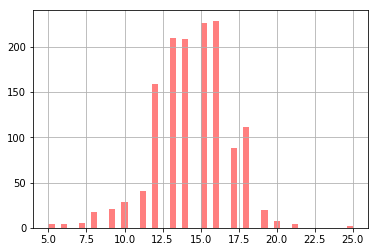

In [38]:
### Distribution of Age of First Use of Alcohol(Given it was their first Drug)
df_tob_mj_first['Age of First Use'].hist(bins=50, color='red', alpha=0.5)
#df_copy['IRALCAGE'].hist(bins=50,color= 'blue', alpha=0.5)
plt.show()

In [41]:
### Proportion whose use of another drug had a first age > than the age they tried Tobacco & Marijuana
df_tob_mj_first['Drug After'].sum(), df_tob_mj_first['Drug After'].sum()/df_tob_mj_first.shape[0]

(1261, 0.9085014409221902)

In [145]:
### Distribution of Age of First Use (Stiumulants, Marijuana, Heroin, Halluciongen) given Tobacco/Marijuana was first
plt.figure(figsize=(10,10))
(df_tob_mj_first[['Age of First Alcohol Use', 'Age of First Stimulant Use', 
                  'Age of First Hallucinogen Use', 'Age of First Heroine Use']]).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Age Distributions of the First Age Uses of Other Drugs\n Given Tobacco and Marijuana were First')
plt.show()

In [144]:
### Proportion of Future Uses of Other subsances
print('Alcohol')
print((df_tob_mj_first['Age of First Alcohol Use'].count(), 
df_tob_mj_first['Age of First Alcohol Use'].count()/df_tob_mj_first.shape[0]))

print('')
print('Stimulants')
print((df_tob_mj_first['Age of First Stimulant Use'].count(), 
df_tob_mj_first['Age of First Stimulant Use'].count()/df_tob_mj_first.shape[0]))

print('')
print('Hallucinogen')
print((df_tob_mj_first['Age of First Hallucinogen Use'].count(), 
df_tob_mj_first['Age of First Hallucinogen Use'].count()/df_tob_mj_first.shape[0]))

print('')
print('Heroine')
print((df_tob_mj_first['Age of First Heroine Use'].count(), 
df_tob_mj_first['Age of First Heroine Use'].count()/df_tob_mj_first.shape[0]))

### Alcohol/Marijuana

In [41]:
### Proportion that have ever Used Alcohol & Marijuana
df_alc_mj = df_copy[(df_copy['ALCFLAG']==1)&(df_copy['MRJFLAG']==1)]
df_alc_mj.shape[0], df_alc_mj.shape[0]/df_copy.shape[0]

(23008, 0.4043798442800148)

In [42]:
### Alcohol & Marijuana were first Substances
df_alc_mj_first = df_copy[(df_copy['TOB First']==0)&(df_copy['ALC First']==1)&(df_copy['MJ First']==1)&(df_copy['HAL First']==0)&(df_copy['STI First']==0)&(df_copy['HER First']==0)]

In [43]:
### Proportion that have used Alcohol & Marijuana and they were their first substances
df_alc_mj_first.shape[0], df_alc_mj_first.shape[0]/df_alc_mj.shape[0]

(1786, 0.07762517385257302)

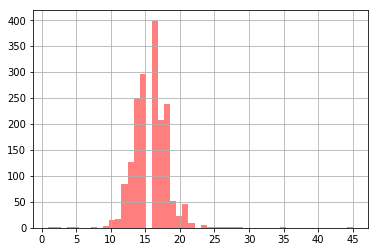

In [44]:
### Distribution of Age of First Use of Alcohol & Marijuana(Given they were their first Drug)
df_alc_mj_first['Age of First Use'].hist(bins=50, color='red', alpha=0.5)
#df_copy['IRALCAGE'].hist(bins=50,color= 'blue', alpha=0.5)
plt.xticks(np.arange(0,50, step=5))
plt.show()

In [45]:
### Proportion whose use of another drug had a first age > than the age they tried Alcohol & Marijuana
df_alc_mj_first['Drug After'].sum(), df_alc_mj_first['Drug After'].sum()/df_alc_mj_first.shape[0]

(1227, 0.687010078387458)

In [143]:
### Distribution of Age of First Use (Tobacco, Stiumulands, Heroin, Halluciongen) given Alcohol/Marijuana was first
plt.figure(figsize=(10,10))
(df_alc_mj_first[['Age of First Tobacco Use','Age of First Stimulant Use', 'Age of First Hallucinogen Use', 
                                   'Age of First Heroine Use']]).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Age Distributions of the First Age Uses of Other Drugs\n Given Alcohol & Marijuana were First')
plt.show()

In [142]:
### Proportion of Future Uses of Other subsances
print('Tobacco')
print((df_alc_mj_first['Age of First Tobacco Use'].count(), 
df_alc_mj_first['Age of First Tobacco Use'].count()/df_alc_mj_first.shape[0]))
print('')

print('')
print('Stimulants')
print((df_alc_mj_first['Age of First Stimulant Use'].count(), 
df_alc_mj_first['Age of First Stimulant Use'].count()/df_alc_mj_first.shape[0]))

print('')
print('Hallucinogen')
print((df_alc_mj_first['Age of First Hallucinogen Use'].count(), 
df_alc_mj_first['Age of First Hallucinogen Use'].count()/df_alc_mj_first.shape[0]))

print('')
print('Heroine')
print((df_alc_mj_first['Age of First Heroine Use'].count(), 
df_alc_mj_first['Age of First Heroine Use'].count()/df_alc_mj_first.shape[0]))

### Tobacco/Alcohol/Marijuana

In [48]:
### Proportion that have ever Used Tobacco, Alcohol, and Marijuana
df_tob_alc_mj = df_copy[(df_copy['ALCFLAG']==1)&((df_copy['TOBFLAG']==1))&((df_copy['MRJFLAG']==1))]

df_tob_alc_mj.shape[0], df_tob_alc_mj.shape[0]/df_copy.shape[0]

(20235, 0.35564265251243476)

In [49]:
### Tobacco, Alcohol & Marijuana were first Substances
df_tob_alc_mj_first = df_copy[(df_copy['TOB First']==1)&(df_copy['ALC First']==1)&(df_copy['MJ First']==1)&(df_copy['HAL First']==0)&(df_copy['STI First']==0)&(df_copy['HER First']==0)]

In [50]:
### Proportion that have used Tobacco, Alcohol & Marijuana and they were their first substances

df_tob_alc_mj_first.shape[0], df_tob_alc_mj_first.shape[0]/df_tob_alc_mj.shape[0]

(1583, 0.07823078823820113)

In [141]:
### Distribution of Age of First Use of Tobacco, Alcohol & Marijuana (Given they were the first Drug)
df_tob_alc_mj_first['Age of First Use'].hist(bins=50, color='red', alpha=0.5)
#df_copy['IRALCAGE'].hist(bins=50,color= 'blue', alpha=0.5)
plt.xticks(np.arange(5, 30, step=5))
plt.show()

In [52]:
### Proportion whose use of another drug had a first age > than the age they tried Tobacco
df_tob_alc_mj_first['Drug After'].sum(), df_tob_alc_mj_first['Drug After'].sum()/df_tob_alc_mj_first.shape[0]

(1076, 0.6797220467466835)

In [139]:
### Distribution of Age of First Use (Stiumulands, Heroin, Halluciongen) given Tobacco/Alcohol/Marijuana was first
plt.figure(figsize=(10,10))
(df_tob_alc_mj_first[['Age of First Stimulant Use', 'Age of First Hallucinogen Use',
                      'Age of First Heroine Use']]).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Age Distributions of the First Age Uses of Other Drugs Given Tobacco, Alcohol & Marijuana were First')
plt.show()

In [140]:
### Proportion of Future Uses of Other subsances
print('Stimulants')
print((df_tob_alc_mj_first['Age of First Stimulant Use'].count(), 
df_tob_alc_mj_first['Age of First Stimulant Use'].count()/df_tob_alc_mj_first.shape[0]))
print('')


print('Hallucinogen')
print((df_tob_alc_mj_first['Age of First Hallucinogen Use'].count(), 
df_tob_alc_mj_first['Age of First Hallucinogen Use'].count()/df_tob_alc_mj_first.shape[0]))
print('')


print('Heroine')
print((df_tob_alc_mj_first['Age of First Heroine Use'].count(), 
df_tob_alc_mj_first['Age of First Heroine Use'].count()/df_tob_alc_mj_first.shape[0]))

In [55]:
df_hal_first = df_copy[(df_copy['TOB First']==0)&(df_copy['ALC First']==0)&(df_copy['MJ First']==0)&(df_copy['HAL First']==1)&(df_copy['STI First']==0)&(df_copy['HER First']==0)]
df_sti_first = df_copy[(df_copy['TOB First']==0)&(df_copy['ALC First']==0)&(df_copy['MJ First']==0)&(df_copy['HAL First']==0)&(df_copy['STI First']==1)&(df_copy['HER First']==0)]
df_her_first = df_copy[(df_copy['TOB First']==0)&(df_copy['ALC First']==0)&(df_copy['MJ First']==0)&(df_copy['HAL First']==0)&(df_copy['STI First']==0)&(df_copy['HER First']==1)]

# First Stiumlant Use

In [58]:
## Each column consists of the age of fist Stimulant use, categorized by the first use of a candidate drug(s)
df_sti = pd.DataFrame({'Tobacco First': df_tob_first['Age of First Stimulant Use'], 'Alcohol First': df_alc_first['Age of First Stimulant Use'], 
             'Marijuana First': df_mj_first['Age of First Stimulant Use'], 'Tob/Alc First': df_tob_alc_first['Age of First Stimulant Use'], 
            'Tob/Mj First': df_tob_mj_first['Age of First Stimulant Use'], 'Alc/Mj First': df_alc_mj_first['Age of First Stimulant Use'], 
            'Tob/Alc/Mj First': df_tob_alc_mj_first['Age of First Stimulant Use']})[['Tobacco First', 'Alcohol First', 
                                                                                    'Marijuana First', 'Tob/Alc First', 
                                                                                    'Tob/Mj First', 'Alc/Mj First', 
                                                                                    'Tob/Alc/Mj First']]

In [509]:
type(df_sti.describe)

method

In [58]:
df_sti.describe().to_csv('Stiumlant_After.csv')

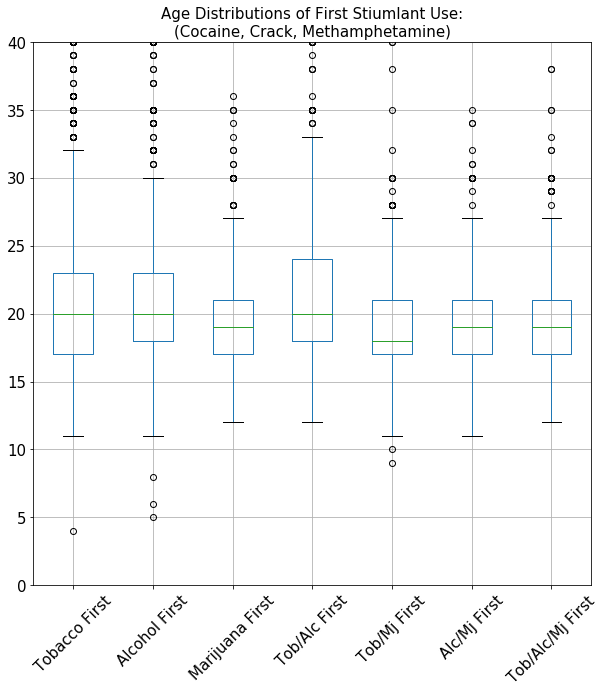

In [189]:
plt.figure(figsize=(10,10))
(df_sti).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0,40))
plt.grid(True)
plt.title('Age Distributions of First Stiumlant Use:\n(Cocaine, Crack, Methamphetamine)', fontsize=15)
plt.show()

In [162]:
## Each column consists of the difference in years between the use of the first candidate drug(s) and the age of first 
## Stimulant use
df_to_sti = pd.DataFrame({'Tob to STI': (df_tob_first['Age of First Stimulant Use'] - df_tob_first['Age of First Use']), 
                       'Alc to STI': (df_alc_first['Age of First Stimulant Use']- df_alc_first['Age of First Use']), 
             'Mj to STI': (df_mj_first['Age of First Stimulant Use']- df_mj_first['Age of First Use']), 
            'Tob/Alc to STI': (df_tob_alc_first['Age of First Stimulant Use']- df_tob_alc_first['Age of First Use']), 
            'Tob/Mj to STI': (df_tob_mj_first['Age of First Stimulant Use']- df_tob_mj_first['Age of First Use']), 
            'Alc/Mj to STI': (df_alc_mj_first['Age of First Stimulant Use']- df_alc_mj_first['Age of First Use']),
            'Tob/Alc/Mj to STI': (df_tob_alc_mj_first['Age of First Stimulant Use']- df_tob_alc_mj_first['Age of First Use'])})

In [176]:
df_to_sti.describe()

,Tob to STI,Alc to STI,Mj to STI,Tob/Alc to STI,Tob/Mj to STI,Alc/Mj to STI,Tob/Alc/Mj to STI
count,1943.000000,1671.000000,580.000000,596.000000,406.000000,404.000000,533.000000
mean,8.667010,7.945542,6.187931,7.622483,5.697044,5.002475,5.075047
std,5.515149,5.008977,4.057130,5.786693,3.687060,3.744640,3.644699
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000,4.000000,3.000000,2.000000,2.000000
50%,8.000000,7.000000,5.000000,6.000000,5.000000,4.000000,4.000000
75%,11.000000,10.000000,8.000000,9.000000,7.000000,6.000000,7.000000
max,45.000000,34.000000,32.000000,38.000000,27.000000,28.000000,25.000000


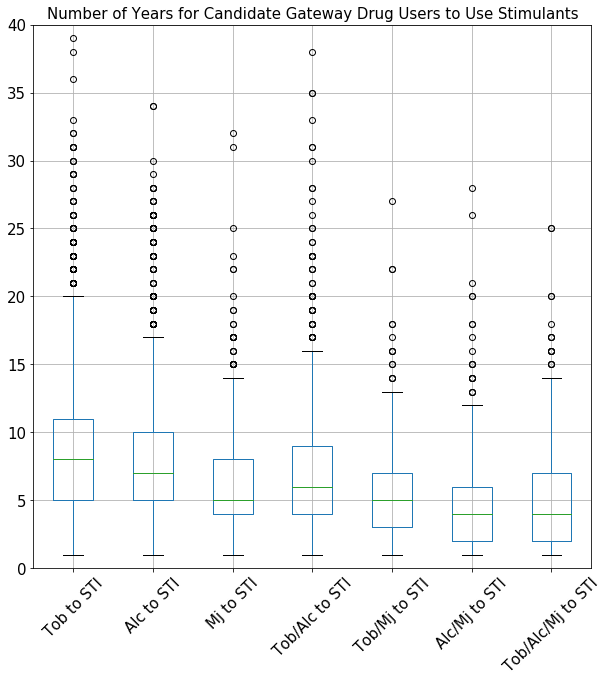

In [173]:
plt.figure(figsize=(10,10))
(df_to_sti).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0,40))
plt.grid(True)
plt.title('Number of Years for Candidate Gateway Drug Users to Use Stimulants', fontsize=15)
plt.show()

# First Hallucinogen Use

In [60]:
## Each column consists of the age of fist Hallucinogen use, categorized by the first use of a candidate drug(s)
df_hal = pd.DataFrame({'Tobacco First': df_tob_first['Age of First Hallucinogen Use'], 'Alcohol First': df_alc_first['Age of First Hallucinogen Use'], 
             'Marijuana First': df_mj_first['Age of First Hallucinogen Use'], 'Tob/Alc First': df_tob_alc_first['Age of First Hallucinogen Use'], 
            'Tob/Mj First': df_tob_mj_first['Age of First Hallucinogen Use'], 'Alc/Mj First': df_alc_mj_first['Age of First Hallucinogen Use'], 
            'Tob/Alc/Mj First': df_tob_alc_mj_first['Age of First Hallucinogen Use']})[['Tobacco First', 'Alcohol First', 
                                                                                    'Marijuana First', 'Tob/Alc First', 
                                                                                    'Tob/Mj First', 'Alc/Mj First', 
                                                                                    'Tob/Alc/Mj First']]

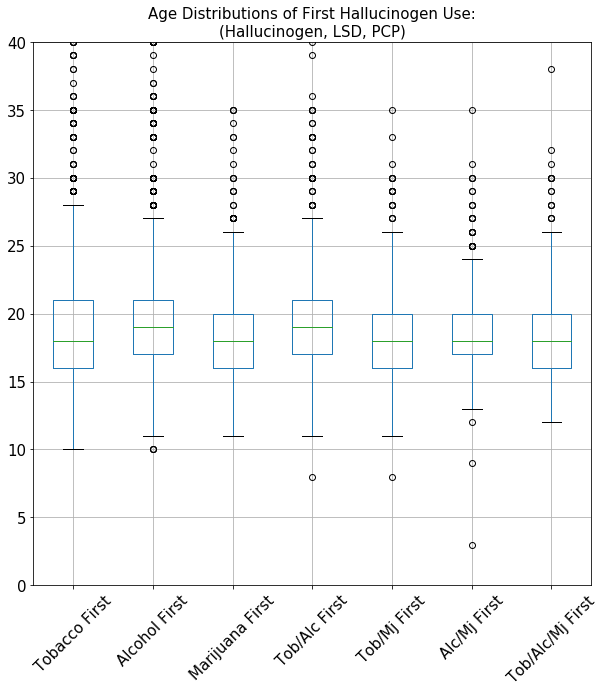

In [190]:
plt.figure(figsize=(10,10))
(df_hal).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0,40))
plt.grid(True)
plt.title('Age Distributions of First Hallucinogen Use:\n(Hallucinogen, LSD, PCP)', fontsize=15)
plt.show()

In [165]:
## Each column consists of the difference in years between the use of the first candidate drug(s) and the age of first 
## Hallucinogen use
df_to_hal = pd.DataFrame({'Tob to HAL': (df_tob_first['Age of First Hallucinogen Use'] - df_tob_first['Age of First Use']), 
                       'Alc to HAL': (df_alc_first['Age of First Hallucinogen Use']- df_alc_first['Age of First Use']), 
             'Mj to HAL': (df_mj_first['Age of First Hallucinogen Use']- df_mj_first['Age of First Use']), 
            'Tob/Alc to HAL': (df_tob_alc_first['Age of First Hallucinogen Use']- df_tob_alc_first['Age of First Use']), 
            'Tob/Mj to HAL': (df_tob_mj_first['Age of First Hallucinogen Use']- df_tob_mj_first['Age of First Use']), 
            'Alc/Mj to HAL': (df_alc_mj_first['Age of First Hallucinogen Use']- df_alc_mj_first['Age of First Use']),
            'Tob/Alc/Mj to HAL': (df_tob_alc_mj_first['Age of First Hallucinogen Use']- df_tob_alc_mj_first['Age of First Use'])})

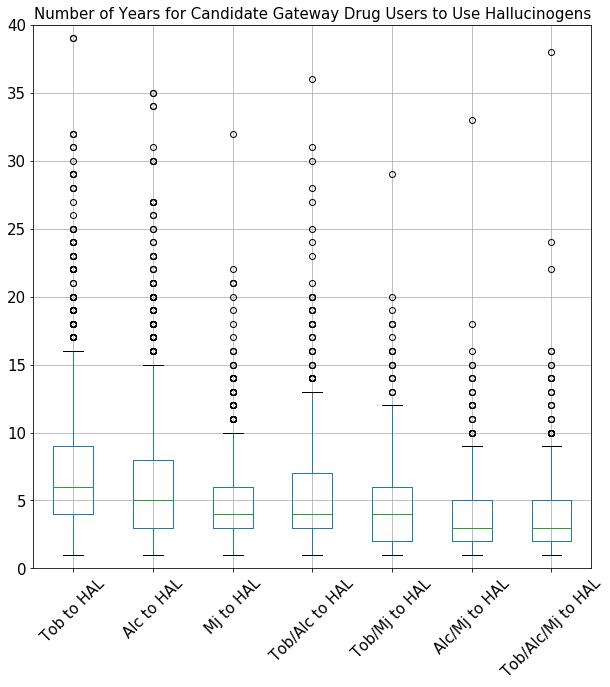

In [172]:
plt.figure(figsize=(10,10))
(df_to_hal).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0,40))
plt.grid(True)
plt.title('Number of Years for Candidate Gateway Drug Users to Use Hallucinogens', fontsize=15)
plt.show()

In [186]:
df_to_hal.describe()

,Tob to HAL,Alc to HAL,Mj to HAL,Tob/Alc to HAL,Tob/Mj to HAL,Alc/Mj to HAL,Tob/Alc/Mj to HAL
count,2144.000000,2120.000000,810.000000,649.000000,491.000000,517.000000,626.000000
mean,6.973881,6.439623,4.940741,5.636364,4.830957,3.810445,3.777955
std,4.771128,4.852631,3.477485,4.592698,3.710704,3.036415,3.264386
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000
50%,6.000000,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000
75%,9.000000,8.000000,6.000000,7.000000,6.000000,5.000000,5.000000
max,39.000000,60.000000,32.000000,36.000000,29.000000,33.000000,38.000000


# First Heroine Use

In [62]:
## Each column consists of the age of fist Heroine use, categorized by the first use of a candidate drug(s)

df_her = pd.DataFrame({'Tobacco First': df_tob_first['Age of First Heroine Use'], 'Alcohol First': df_alc_first['Age of First Heroine Use'], 
             'Marijuana First': df_mj_first['Age of First Heroine Use'], 'Tob/Alc First': df_tob_alc_first['Age of First Heroine Use'], 
            'Tob/Mj First': df_tob_mj_first['Age of First Heroine Use'], 'Alc/Mj First': df_alc_mj_first['Age of First Heroine Use'], 
            'Tob/Alc/Mj First': df_tob_alc_mj_first['Age of First Heroine Use']})[['Tobacco First', 'Alcohol First', 
                                                                                    'Marijuana First', 'Tob/Alc First', 
                                                                                    'Tob/Mj First', 'Alc/Mj First', 
                                                                                    'Tob/Alc/Mj First']]

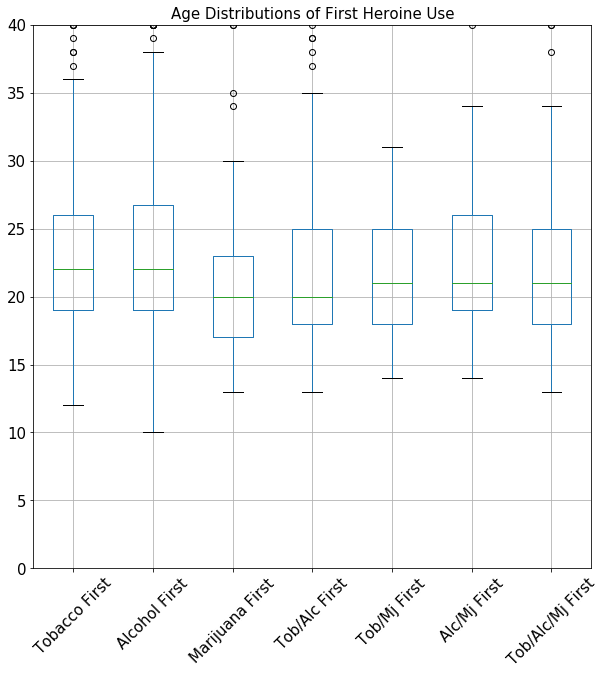

In [191]:
plt.figure(figsize=(10,10))
(df_her).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0,40))
plt.grid(True)
plt.title('Age Distributions of First Heroine Use', fontsize=15)
plt.show()

In [167]:
## Each column consists of the difference in years between the use of the first candidate drug(s) and the age of first 
## Heroine Use use
df_to_her = pd.DataFrame({'Tob to HER': (df_tob_first['Age of First Heroine Use'] - df_tob_first['Age of First Use']), 
                       'Alc to HER': (df_alc_first['Age of First Heroine Use']- df_alc_first['Age of First Use']), 
             'Mj to HER': (df_mj_first['Age of First Heroine Use']- df_mj_first['Age of First Use']), 
            'Tob/Alc to HER': (df_tob_alc_first['Age of First Heroine Use']- df_tob_alc_first['Age of First Use']), 
            'Tob/Mj to HER': (df_tob_mj_first['Age of First Heroine Use']- df_tob_mj_first['Age of First Use']), 
            'Alc/Mj to HER': (df_alc_mj_first['Age of First Heroine Use']- df_alc_mj_first['Age of First Use']),
            'Tob/Alc/Mj to HER': (df_tob_alc_mj_first['Age of First Heroine Use']- df_tob_alc_mj_first['Age of First Use'])})

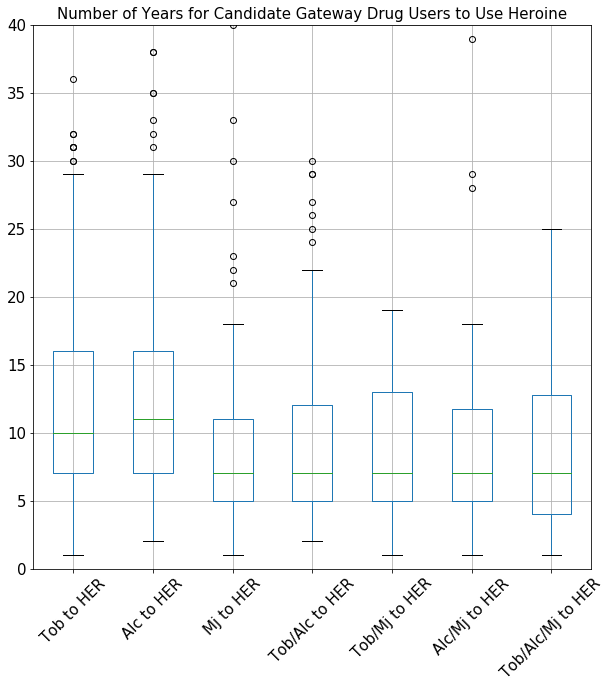

In [174]:
plt.figure(figsize=(10,10))
(df_to_her).boxplot()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0,40))
plt.grid(True)
plt.title('Number of Years for Candidate Gateway Drug Users to Use Heroine', fontsize=15)
plt.show()

In [187]:
df_to_her.describe()

,Tob to HER,Alc to HER,Mj to HER,Tob/Alc to HER,Tob/Mj to HER,Alc/Mj to HER,Tob/Alc/Mj to HER
count,270.000000,190.000000,90.000000,84.000000,91.000000,54.000000,82.000000
mean,11.922222,12.531579,9.111111,9.380952,8.406593,8.759259,8.560976
std,6.843271,7.766878,7.012740,6.838771,4.555773,7.237051,5.931913
min,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,7.000000,7.000000,5.000000,5.000000,5.000000,5.000000,4.000000
50%,10.000000,11.000000,7.000000,7.000000,7.000000,7.000000,7.000000
75%,16.000000,16.000000,11.000000,12.000000,13.000000,11.750000,12.750000
max,36.000000,41.000000,40.000000,30.000000,19.000000,39.000000,25.000000


## Any Substance

In [ ]:
print(df_copy[df_copy['Ever Used']==1].shape[0], df_copy[df_copy['Ever Used']==1].shape[0]/df_copy.shape[0])


### proportion of users whose first subsances were
# Tobacco
# Alcohol
# Marijuana
# Tobacco/Alcohol
# Tobacco/Marijuana
# Alcohol/Marijuana
# Tobacco/Alcohol/Marijuana
# Hallucinogens
# Stimulants
# Heroine
print(df_tob_first.shape[0], df_tob_first.shape[0]/df_copy[df_copy['Ever Used']==1].shape[0])
print(df_alc_first.shape[0], df_alc_first.shape[0]/df_copy[df_copy['Ever Used']==1].shape[0])
print(df_mj_first.shape[0], df_mj_first.shape[0]/df_copy[df_copy['Ever Used']==1].shape[0])
print(df_tob_alc_first.shape[0], df_tob_alc_first.shape[0]/df_copy[df_copy['Ever Used']==1].shape[0])
print(df_tob_mj_first.shape[0], df_tob_mj_first.shape[0]/df_copy[df_copy['Ever Used']==1].shape[0])
print(df_alc_mj_first.shape[0], df_alc_mj_first.shape[0]/df_copy[df_copy['Ever Used']==1].shape[0])
print(df_tob_alc_mj_first.shape[0], df_tob_alc_mj_first.shape[0]/df_copy[df_copy['Ever Used']==1].shape[0])
print(df_hal_first.shape[0], df_hal_first.shape[0]/df_copy[df_copy['Ever Used']==1].shape[0])
print(df_sti_first.shape[0], df_sti_first.shape[0]/df_copy[df_copy['Ever Used']==1].shape[0])
print(df_her_first.shape[0], df_her_first.shape[0]/df_copy[df_copy['Ever Used']==1].shape[0])
